In [9]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LassoLarsCV

In [2]:
#Load the dataset
data = pd.read_csv("tree_addhealth.csv")

#upper-case all DataFrame column names
data.columns = map(str.upper, data.columns)


In [3]:
# Data Management
data_clean = data.dropna()
recode1 = {1:1, 2:0}
data_clean['MALE']= data_clean['BIO_SEX'].map(recode1)
data_clean.head()

/Users/williamz/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,BIO_SEX,HISPANIC,WHITE,BLACK,NAMERICAN,ASIAN,AGE,TREG1,ALCEVR1,ALCPROBS1,...,VIOL1,PASSIST,DEVIANT1,SCHCONN1,GPA1,EXPEL1,FAMCONCT,PARACTV,PARPRES,MALE
1,2,0,0,1,0,0,19.427397,1,1,1,...,1,0,5,22,2.333333,0,23.3,9,15,0
3,1,0,0,1,0,0,20.430137,1,0,0,...,4,1,4,19,2.000000,0,18.7,6,14,1
5,1,0,0,1,0,0,14.509589,0,0,0,...,3,0,0,27,2.666667,0,23.7,3,13,1
6,1,0,0,1,0,0,13.676712,0,0,0,...,5,0,7,18,2.500000,0,24.7,6,13,1
7,1,0,1,0,0,0,15.178082,1,1,0,...,8,1,6,20,1.500000,0,22.3,10,14,1


In [4]:
#select predictor variables and target variable as separate data sets  
predvar= data_clean[['MALE','HISPANIC','WHITE','BLACK','NAMERICAN','ASIAN',
'AGE','ALCEVR1','ALCPROBS1','MAREVER1','COCEVER1','INHEVER1','CIGAVAIL','DEP1',
'ESTEEM1','VIOL1','PASSIST','DEVIANT1','GPA1','EXPEL1','FAMCONCT','PARACTV',
'PARPRES']]

target = data_clean.SCHCONN1

In [5]:
# standardize predictors to have mean=0 and sd=1
predictors=predvar.copy()
from sklearn import preprocessing
predictors['MALE']=preprocessing.scale(predictors['MALE'].astype('float64'))
predictors['HISPANIC']=preprocessing.scale(predictors['HISPANIC'].astype('float64'))
predictors['WHITE']=preprocessing.scale(predictors['WHITE'].astype('float64'))
predictors['NAMERICAN']=preprocessing.scale(predictors['NAMERICAN'].astype('float64'))
predictors['ASIAN']=preprocessing.scale(predictors['ASIAN'].astype('float64'))
predictors['AGE']=preprocessing.scale(predictors['AGE'].astype('float64'))
predictors['ALCEVR1']=preprocessing.scale(predictors['ALCEVR1'].astype('float64'))
predictors['ALCPROBS1']=preprocessing.scale(predictors['ALCPROBS1'].astype('float64'))
predictors['MAREVER1']=preprocessing.scale(predictors['MAREVER1'].astype('float64'))
predictors['COCEVER1']=preprocessing.scale(predictors['COCEVER1'].astype('float64'))
predictors['INHEVER1']=preprocessing.scale(predictors['INHEVER1'].astype('float64'))
predictors['CIGAVAIL']=preprocessing.scale(predictors['CIGAVAIL'].astype('float64'))
predictors['DEP1']=preprocessing.scale(predictors['DEP1'].astype('float64'))
predictors['ESTEEM1']=preprocessing.scale(predictors['ESTEEM1'].astype('float64'))
predictors['VIOL1']=preprocessing.scale(predictors['VIOL1'].astype('float64'))
predictors['PASSIST']=preprocessing.scale(predictors['PASSIST'].astype('float64'))
predictors['DEVIANT1']=preprocessing.scale(predictors['DEVIANT1'].astype('float64'))
predictors['GPA1']=preprocessing.scale(predictors['GPA1'].astype('float64'))
predictors['EXPEL1']=preprocessing.scale(predictors['EXPEL1'].astype('float64'))
predictors['FAMCONCT']=preprocessing.scale(predictors['FAMCONCT'].astype('float64'))
predictors['PARACTV']=preprocessing.scale(predictors['PARACTV'].astype('float64'))
predictors['PARPRES']=preprocessing.scale(predictors['PARPRES'].astype('float64'))

In [6]:
# split data into train and test sets
pred_train, pred_test, tar_train, tar_test = train_test_split(predictors, target, 
                                                              test_size=.3, random_state=123)

# specify the lasso regression model
model=LassoLarsCV(cv=10, precompute=False).fit(pred_train,tar_train)

In [7]:
dict(zip(predictors.columns, model.coef_))

{'AGE': 0.21734102065276484,
 'ALCEVR1': -0.32499649609664039,
 'ALCPROBS1': 0.0,
 'ASIAN': 0.18869030694622715,
 'BLACK': -0.69364786863868466,
 'CIGAVAIL': -0.10983879188950869,
 'COCEVER1': -0.20000921703105098,
 'DEP1': -0.85417844475686833,
 'DEVIANT1': -0.41808246027791607,
 'ESTEEM1': 1.0974098143740532,
 'EXPEL1': -0.073828998548620822,
 'FAMCONCT': 0.51527294787431954,
 'GPA1': 0.66557641766975495,
 'HISPANIC': 0.2030047450001089,
 'INHEVER1': 0.0,
 'MALE': -0.21508693783565538,
 'MAREVER1': -0.15980377488873737,
 'NAMERICAN': -0.10784573616426547,
 'PARACTV': 0.29991192982913373,
 'PARPRES': 0.0,
 'PASSIST': 0.0,
 'VIOL1': -0.63926717022798962,
 'WHITE': 0.0}

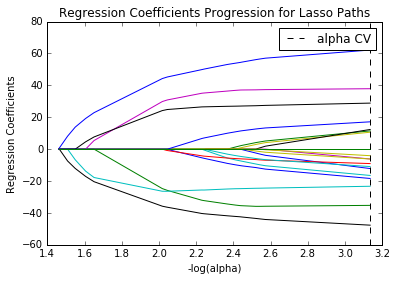

In [14]:
# plot coefficient progression
m_log_alphas = -np.log10(model.alphas_)
ax = plt.gca()
plt.plot(m_log_alphas, model.coef_path_.T)
plt.axvline(-np.log10(model.alpha_), linestyle='--', color='k',
            label='alpha CV')
plt.legend()
plt.ylabel('Regression Coefficients')
plt.xlabel('-log(alpha)')
plt.title('Regression Coefficients Progression for Lasso Paths')

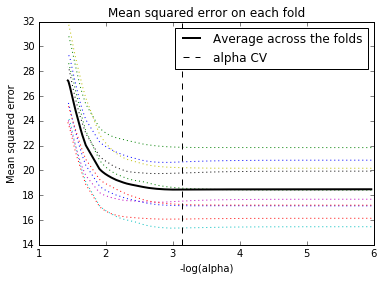

In [11]:
# plot mean square error for each fold
m_log_alphascv = -np.log10(model.cv_alphas_)
plt.figure()
plt.plot(m_log_alphascv, model.cv_mse_path_, ':')
plt.plot(m_log_alphascv, model.cv_mse_path_.mean(axis=-1), 'k',
         label='Average across the folds', linewidth=2)
plt.axvline(-np.log10(model.alpha_), linestyle='--', color='k',
            label='alpha CV')
plt.legend()
plt.xlabel('-log(alpha)')
plt.ylabel('Mean squared error')
plt.title('Mean squared error on each fold')

In [12]:
# MSE from training and test data
from sklearn.metrics import mean_squared_error
train_error = mean_squared_error(tar_train, model.predict(pred_train))
test_error = mean_squared_error(tar_test, model.predict(pred_test))
print ('training data MSE')
print(train_error)
print ('test data MSE')
print(test_error)

training data MSE
18.1485726641
test data MSE
17.2925174272


In [13]:
# R-square from training and test data
rsquared_train=model.score(pred_train,tar_train)
rsquared_test=model.score(pred_test,tar_test)
print ('training data R-square')
print(rsquared_train)
print ('test data R-square')
print(rsquared_test)


training data R-square
0.333611136927
test data R-square
0.31001113416
